In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Importing Required Libraries
This section imports essential libraries for deep learning, data processing, visualization, and dataset management.

## Project Objective
The goal of this project is to build a deep learning model that can classify fashion product images based on the following attributes:
- **Color** of the product
- **Type** of product (e.g., T-shirt, shoes, etc.)
- **Seasonal Preference** (e.g., Summer, Winter, etc.)
- **Gender Category** (Men, Women, Unisex)

To achieve this, unnecessary columns from `styles.csv` have been removed, keeping only the relevant attributes.

In [ ]:
import pandas as pd
import os

# Load dataset
df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines="skip")

# Select relevant columns
df = df[["id", "baseColour", "articleType", "season", "gender"]]

## Handling Missing Values
Since the dataset is large, the missing (`NaN`) values are minimal. Dropping these rows does not significantly impact model accuracy.

In [ ]:
df.isnull().sum()

id              0
baseColour     15
articleType     0
season         21
gender          0
dtype: int64

In [ ]:

df = df.dropna().reset_index(drop=True)


## Exploratory Data Analysis (EDA)
This section visualizes the distribution of product categories, color variations, and gender-based classifications.

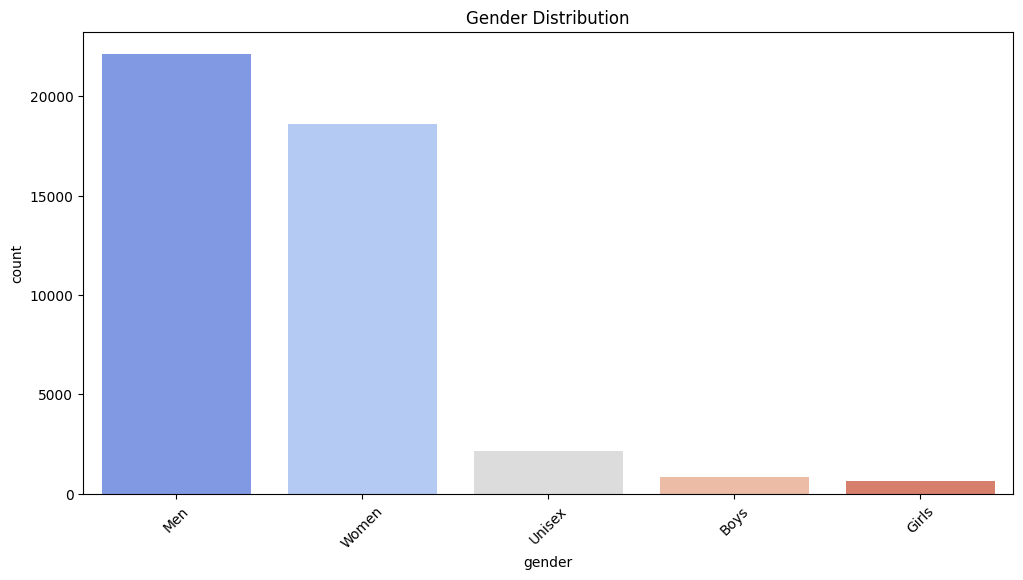

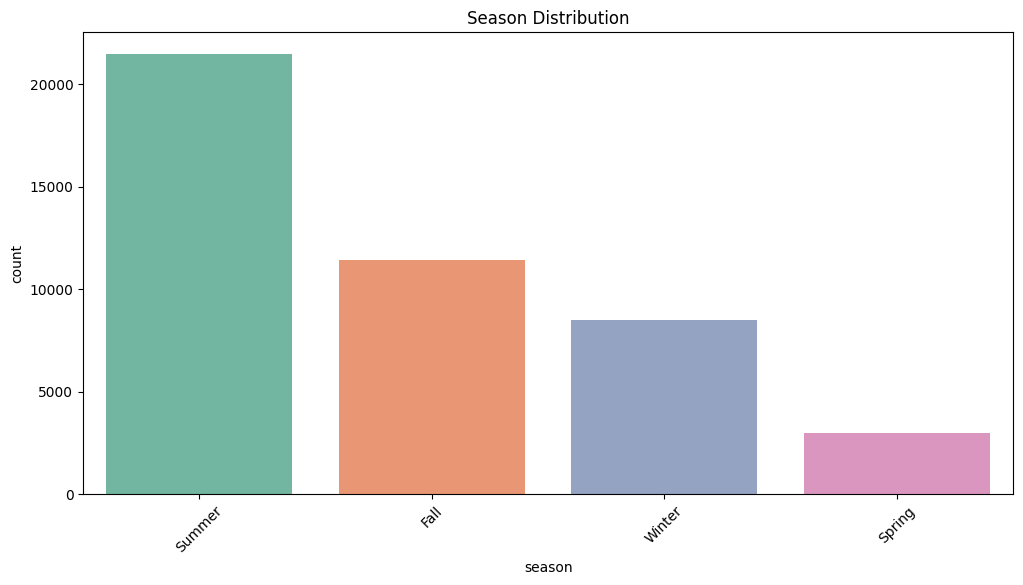

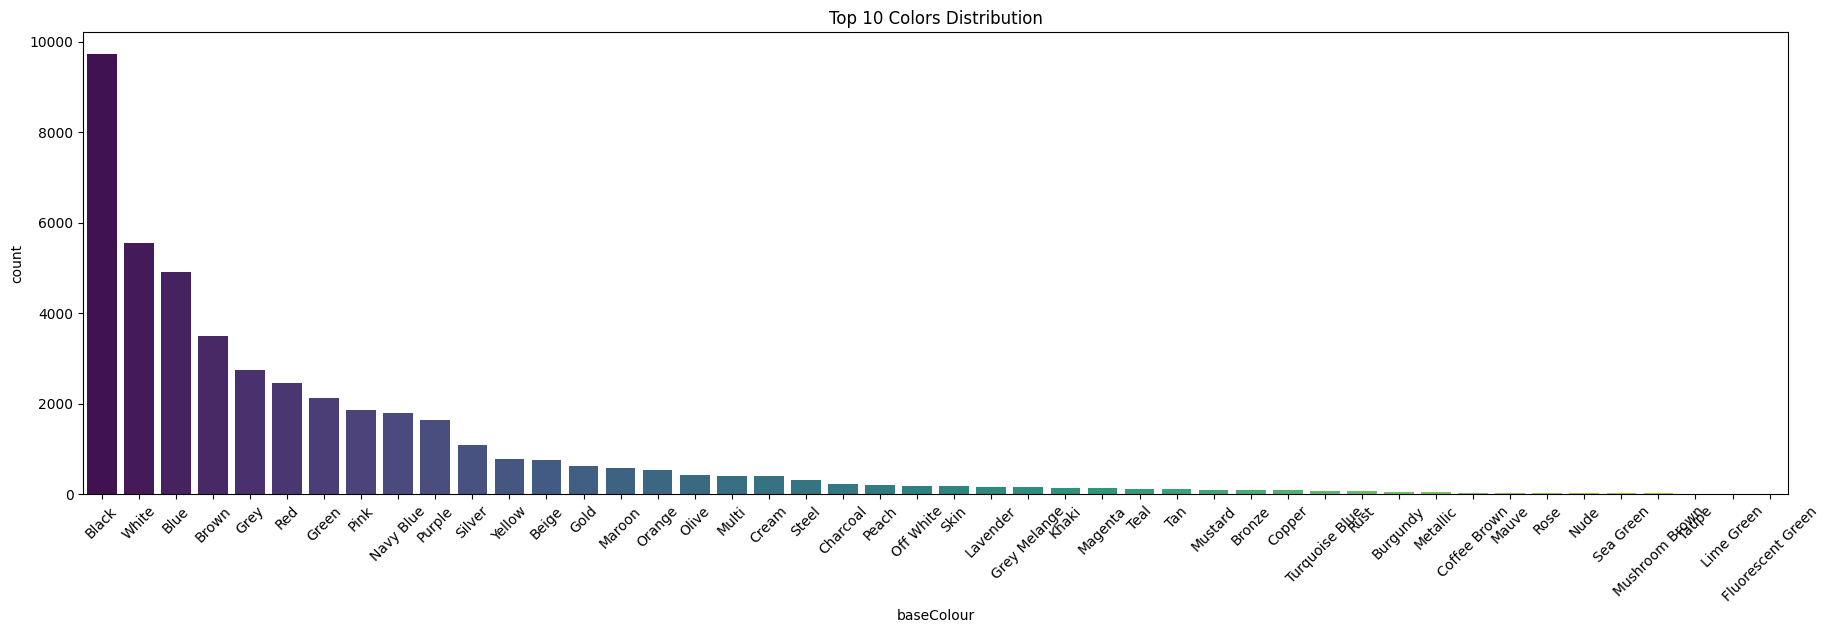

In [ ]:
import seaborn as sns
# Plot distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="gender", order=df["gender"].value_counts().index, palette="coolwarm")
plt.title("Gender Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="season", order=df["season"].value_counts().index, palette="Set2")
plt.title("Season Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(22, 6))
sns.countplot(data=df, x="baseColour", order=df["baseColour"].value_counts().index[:100], palette="viridis")
plt.title("Top 10 Colors Distribution")
plt.xticks(rotation=45)
plt.show()

## One-Hot Encoding for Categorical Variables
One-hot encoding is applied using `pandas.get_dummies()`, which replaces categorical columns with corresponding binary-encoded columns.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['baseColour', 'articleType', 'season', 'gender']).astype(int)


In [ ]:
df_encoded=df_encoded.iloc[:40000]

## Processed Data Preview
Below is the preview of the DataFrame after preprocessing, showing the cleaned and transformed data.

In [ ]:
df_encoded

,id,baseColour_Beige,baseColour_Black,baseColour_Blue,baseColour_Bronze,baseColour_Brown,baseColour_Burgundy,baseColour_Charcoal,baseColour_Coffee Brown,baseColour_Copper,...,articleType_Wristbands,season_Fall,season_Spring,season_Summer,season_Winter,gender_Boys,gender_Girls,gender_Men,gender_Unisex,gender_Women
0,15970,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,39386,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,59263,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,21379,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,53759,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,23858,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
39996,30473,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
39997,3374,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
39998,12723,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_encoded["id"] = df["id"].astype(str) + ".jpg"

In [ ]:
encoded_labels=df_encoded.columns[1:199].tolist()

"I ensure consistency by verifying that all images are present in the dataset. Any missing image names are extracted to prevent errors during data processing

In [ ]:
import os

# Define source image list (e.g., from a CSV, dataset, etc.)
source_images =df_encoded["id"]  # Example list

# Path to destination folder
destination_folder = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"

# List all files in the destination folder
destination_files = set(os.listdir(destination_folder))

# Find missing images
missing_images = [img for img in source_images if img not in destination_files]

# Output result
if missing_images:
    print(f"Missing images: {missing_images}")
else:
    print("All images are present!")


Missing images: ['39403.jpg', '39410.jpg', '39401.jpg', '39425.jpg', '12347.jpg']


In [ ]:
df_encoded= df_encoded.drop(df_encoded[df_encoded['id'] == "39403.jpg"].index)
df_encoded= df_encoded.drop(df_encoded[df_encoded['id'] == "39410.jpg"].index)
df_encoded= df_encoded.drop(df_encoded[df_encoded['id'] == "32396.jpg"].index)
df_encoded= df_encoded.drop(df_encoded[df_encoded['id'] == "39401.jpg"].index)
df_encoded= df_encoded.drop(df_encoded[df_encoded['id'] == "39425.jpg"].index)
df_encoded= df_encoded.drop(df_encoded[df_encoded['id'] == "12347.jpg"].index)





In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing import image

img_width, img_height = 128, 128
X = []

df_encoded = df_encoded.reset_index(drop=True)  # Reset index

for i in tqdm(range(len(df_encoded))):  # Use len() instead of shape[0]
    path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/" + df_encoded.iloc[i]['id']
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img) / 255.0
    X.append(img)



100%|██████████| 39994/39994 [16:57<00:00, 39.32it/s]


In [ ]:
import numpy as np
X = np.array(X)


In [ ]:
X.shape

(39994, 128, 128, 3)

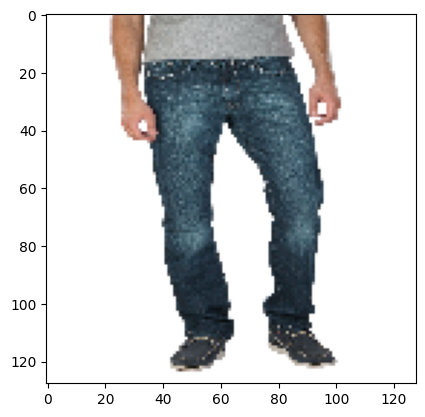

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

## Conclusion
The deep learning model successfully classifies fashion products based on color, type, season, and gender category. Further improvements can be made through hyperparameter tuning and leveraging pre-trained models for transfer learning.

In [ ]:
y = df_encoded.drop(['id'], axis = 1)
y = y.to_numpy()
y.shape

(39994, 198)

In [ ]:
y[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

spliting the data into train and the test

## Splitting Dataset into Training and Testing Sets
The dataset is divided into training and testing sets using an 80-20 split to ensure a balanced training process.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

Here as spliting cause another instance of the image data and it require more ram for the press i have deleted the X varibles as it has no uise in the further process

In [ ]:
import gc
# Free memory manually

del X# Deletes the variable
gc.collect()

40

In [ ]:
X_train[0].shape

(128, 128, 3)

## Model Architecture



> In multi-class classification, we use the Softmax activation function because it assigns probabilities to each class, ensuring they add up to one. This helps in selecting a single class with the highest probability. For multi-label classification, we use the Sigmoid activation function. Unlike Softmax, Sigmoid allows multiple classes to be predicted at the same time. Each class gets an independent probability score, meaning a model can predict one, multiple, or no classes for an input.

>In multi-class classification, we use categorical_crossentropy loss because it helps the model learn the correct class by comparing predictions to the true class distribution, where only one class is correct. For multi-label classification, we treat each class as a separate binary problem, meaning each neuron in the output layer makes an independent decision for a specific class. Since binary_crossentropy is designed for yes/no classification, it works best for multi-label problems where multiple classes can be true at the same time.

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(198, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Compilation and Training
The model is compiled using the Adam optimizer and categorical cross-entropy loss. Training is conducted over multiple epochs, with validation data used for performance monitoring.

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["AUC", "Precision", "Recall"]
)


Trainig the model for 70 epocs

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - AUC: 0.7084 - Precision: 0.0534 - Recall: 0.3331 - loss: 0.3589 - val_AUC: 0.9301 - val_Precision: 0.6128 - val_Recall: 0.2189 - val_loss: 0.0587
Epoch 2/50
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - AUC: 0.9451 - Precision: 0.6285 - Recall: 0.2851 - loss: 0.0535 - val_AUC: 0.9556 - val_Precision: 0.6678 - val_Recall: 0.3178 - val_loss: 0.0492
Epoch 3/50
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - AUC: 0.9596 - Precision: 0.6829 - Recall: 0.3619 - loss: 0.0470 - val_AUC: 0.9268 - val_Precision: 0.6132 - val_Recall: 0.3191 - val_loss: 0.0563
Epoch 4/50
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - AUC: 0.9656 - Precision: 0.7090 - Recall: 0.4117 - loss: 0.0435 - val_AUC: 0.9285 - val_Precision: 0.5812 - val_Recall: 0.3133 - val_loss: 0.0564
Epoch 5/50
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - AUC: 0.9703 - Precision: 0.7245 - Recall: 0.4504 - loss: 0.0408 - val_AUC: 0.9648 - val_Precision: 0.6860 - val_Recall: 0.4060

saving the model

In [ ]:
model.save("model.keras")

## Model Evaluation
The trained model is evaluated using accuracy, precision, recall, and F1-score to measure classification performance.

The metrics plotted in the code serve as key performance indicators for evaluating the model's training progress and effectiveness:

1. AUC (Area Under the Curve) – Measures the model's ability to distinguish between classes. A higher AUC indicates better classification performance.
2. Precision – Represents the proportion of correctly predicted positive instances out of all predicted positives. High precision means fewer false positives.
3. Recall – Indicates the proportion of actual positive cases correctly identified by the model. High recall means fewer false negatives.
4. Loss – Represents the error between predicted and actual values. Lower loss values indicate better model performance.
These metrics help track overfitting, convergence, and overall learning behavior.

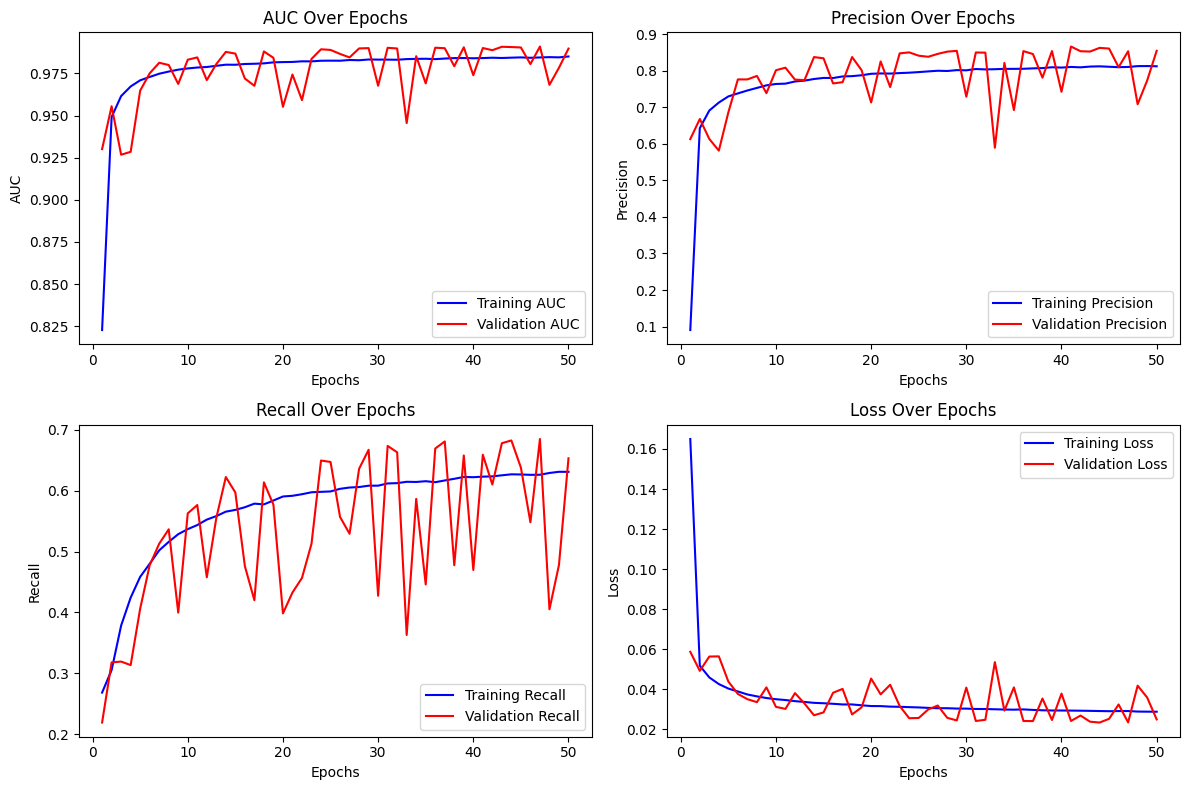

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
epochs = range(1, len(history.history['AUC']) + 1)  # Dynamically adjust to available epochs

# Ensure all metrics have 50 values
auc = history.history['AUC'][:50]
val_auc = history.history['val_AUC'][:50]
precision = history.history['Precision'][:50]
val_precision = history.history['val_Precision'][:50]
recall = history.history['Recall'][:50]
val_recall = history.history['val_Recall'][:50]
loss = history.history['loss'][:50]
val_loss = history.history['val_loss'][:50]

# Plot AUC
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC Over Epochs')

# Plot Precision
plt.subplot(2, 2, 2)
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Over Epochs')

# Plot Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall Over Epochs')

# Plot Loss
plt.subplot(2, 2, 4)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()


##Conclusion from Model Evaluation Graphs:
**AUC Over Epochs**:

The model achieves a high AUC score (~0.98), indicating strong classification performance.
Training and validation AUC curves are closely aligned, suggesting minimal overfitting.

**Precision Over Epochs**:

Precision improves steadily and stabilizes around 0.85–0.90.
Validation precision fluctuates slightly but follows the training trend, showing good generalization.

**Recall Over Epochs**:

Training recall increases steadily, while validation recall is more volatile.
The fluctuations in validation recall suggest potential model instability or sensitivity to data variations.

**Loss Over Epochs**:

Training and validation loss decrease consistently, confirming effective learning.
The slight variance in validation loss suggests some degree of noise but no severe overfitting

In [ ]:
encoded_labels=df_encoded.columns[1:199].tolist()
print(len(encoded_labels))

198


1. This function predicts the category of an input image using a trained deep learning model. It first loads and preprocesses the image (resizing, normalizing, and adding a batch dimension).
2. The model generates predictions, which are then split into four groups (representing different attributes like color, type, season, and gender).
3. The function finds the highest probability class in each group and retrieves the corresponding labels. Finally, it returns the predicted labels for the image.

## Sample Predictions
Sample fashion product images are passed through the trained model to check predictions and assess classification accuracy.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


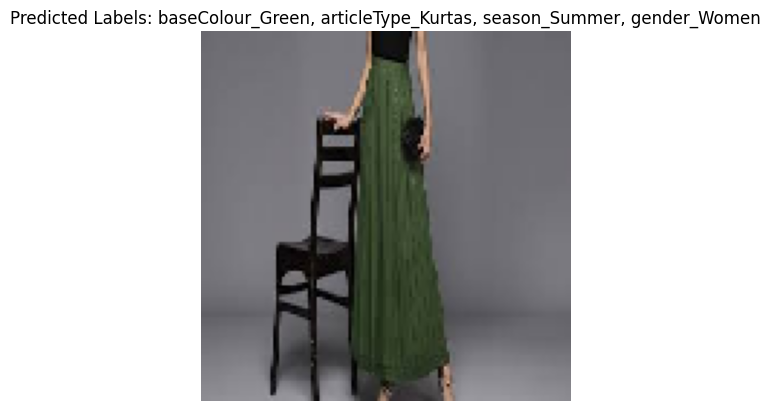

Predicted Labels: ['baseColour_Green', 'articleType_Kurtas', 'season_Summer', 'gender_Women']


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf

def predict_image(img_path, model, label_columns):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128,128))  # Match input size
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


    # Get predictions
    preds = model.predict(img_array)[0]  # Remove batch dimension

    lst = preds

    # Use list slicing to split the list
    list1 = lst[:46]           # First 46 elements
    list2 = lst[46:46+143]     # Next 143 elements
    list3 = lst[46+143:46+143+4]  # Next 4 elements
    list4 = lst[46+143+4:46+143+4+5]  # Next 5 elements

    # Find max values in each slice
    max1 = max(list1)
    max2 = max(list2)
    max3 = max(list3)
    max4 = max(list4)

    # Convert to NumPy indices to get correct positions
    max1_idx = np.where(lst == max1)[0][0]
    max2_idx = np.where(lst == max2)[0][0]
    max3_idx = np.where(lst == max3)[0][0]
    max4_idx = np.where(lst == max4)[0][0]




    # Get corresponding labels
    plabel = [label_columns[max1_idx], label_columns[max2_idx], label_columns[max3_idx], label_columns[max4_idx]]


    # Display image with labels
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Labels: {', '.join(plabel)}")
    plt.show()

    return plabel


img_path = "/kaggle/input/samplesss/skirts.jpg"
predicted_labels= predict_image(img_path, model, encoded_labels)  # LABEL_COLUMNS = list of class names
print("Predicted Labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


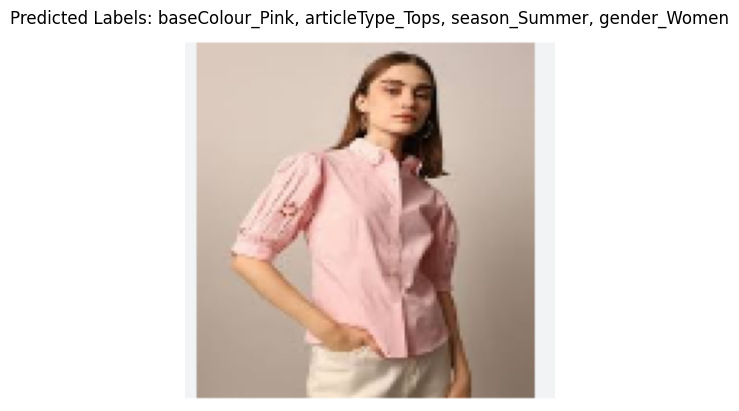

Predicted Labels: ['baseColour_Pink', 'articleType_Tops', 'season_Summer', 'gender_Women']


In [ ]:
img_path = "/kaggle/input/samplesss/2.png"
predicted_labels = predict_image(img_path, model, encoded_labels)  # LABEL_COLUMNS = list of class names
print("Predicted Labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


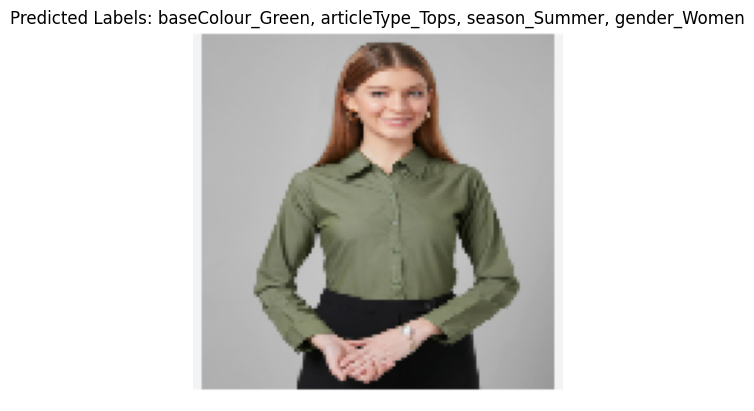

Predicted Labels: ['baseColour_Green', 'articleType_Tops', 'season_Summer', 'gender_Women']


In [ ]:
img_path = "/kaggle/input/samplesss/8.png"
predicted_labels = predict_image(img_path, model, encoded_labels)  # LABEL_COLUMNS = list of class names
print("Predicted Labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


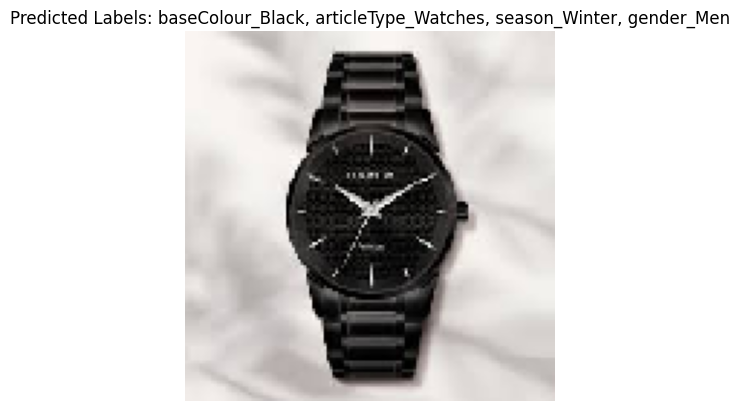

Predicted Labels: ['baseColour_Black', 'articleType_Watches', 'season_Winter', 'gender_Men']


In [ ]:
img_path = "/kaggle/input/2files/watch.jpg"
predicted_labels = predict_image(img_path, model, encoded_labels)  # LABEL_COLUMNS = list of class names
print("Predicted Labels:", predicted_labels)
